## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [1]:
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [2]:
#!unzip -q concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [4]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [5]:
#Define directory

train_dir = r'C:\Users\Dennis\Desktop\AI Capstone Project with Deep Learning\concrete_data_week4\train'
validation_dir = r'C:\Users\Dennis\Desktop\AI Capstone Project with Deep Learning\concrete_data_week4\valid'
test_dir = r'C:\Users\Dennis\Desktop\AI Capstone Project with Deep Learning\concrete_data_week4\test'

###  Generating batches of tensor image data

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size = (224,224),
            class_mode = 'categorical',
            batch_size = 100
            )

Found 30000 images belonging to 2 classes.


In [7]:
validation_generator = valid_datagen.flow_from_directory(
            validation_dir,
            target_size = (224,224),
            class_mode = 'categorical',
            batch_size = 100
            )

Found 9500 images belonging to 2 classes.


### Create a CNN Generic model using Keras

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=512, activation='relu'))

model.add(layers.Dense(units=2, activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)      

In [10]:
checkpoint = ModelCheckpoint("cnn.h5",monitor='val_loss',verbose=1,save_best_only=True)

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1)

In [13]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=10,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50,
                    callbacks=[checkpoint,early])

Epoch 1/10
10/10 [==============================] - 130s 13s/step - loss: 0.8371 - accuracy: 0.5040 - val_loss: 0.7815 - val_accuracy: 0.5070

Epoch 00001: val_loss improved from inf to 0.78150, saving model to cnn.h5
Epoch 2/10
10/10 [==============================] - 124s 12s/step - loss: 0.6910 - accuracy: 0.5360 - val_loss: 0.7305 - val_accuracy: 0.4900

Epoch 00002: val_loss improved from 0.78150 to 0.73045, saving model to cnn.h5
Epoch 3/10
10/10 [==============================] - 124s 12s/step - loss: 0.6461 - accuracy: 0.5850 - val_loss: 0.4820 - val_accuracy: 0.7690

Epoch 00003: val_loss improved from 0.73045 to 0.48204, saving model to cnn.h5
Epoch 4/10
10/10 [==============================] - 122s 12s/step - loss: 0.7392 - accuracy: 0.6870 - val_loss: 0.5826 - val_accuracy: 0.8010

Epoch 00004: val_loss did not improve from 0.48204
Epoch 5/10
10/10 [==============================] - 118s 12s/step - loss: 0.3983 - accuracy: 0.8550 - val_loss: 0.1857 - val_accuracy: 0.9432

E

In [ ]:
#Plot Graph to see the result
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [14]:
del model

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [6]:
cnn = load_model("cnn.h5")

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size = (224,224),
            class_mode = 'categorical',
            batch_size = 100,
            shuffle=False)

Found 500 images belonging to 2 classes.


In [9]:
cnnloss = cnn.evaluate_generator(test_generator,steps=5,verbose=1)

5/5 [==============================] - 9s 2s/step


In [10]:
cnnloss

[0.04639992117881775, 0.9860000014305115]

In [11]:
print("Accuracy is %.2f%%" % (cnnloss[1]*100))

Accuracy is 98.60%


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

### Method 1

In [21]:
test_generator.reset()

In [12]:
pred=cnn.predict_generator(test_generator, steps=len(test_generator), verbose=1)

5/5 [==============================] - 8s 2s/step


In [13]:
pred

array([[3.45648885e-01, 2.54797935e-03],
       [3.58892858e-01, 3.79788876e-03],
       [3.54529738e-01, 4.68012691e-03],
       [3.42454255e-01, 5.47006726e-03],
       [3.75858247e-01, 6.25211000e-03],
       [2.21439213e-01, 1.39407814e-02],
       [3.82224202e-01, 6.92352653e-03],
       [4.12553638e-01, 1.91785693e-02],
       [3.73071134e-01, 4.69848514e-03],
       [3.54451299e-01, 4.40987945e-03],
       [3.72827739e-01, 5.06946445e-03],
       [3.83346528e-01, 8.42589140e-03],
       [3.91592592e-01, 9.91898775e-03],
       [3.73605162e-01, 5.56546450e-03],
       [3.75318736e-01, 6.47369027e-03],
       [3.61631095e-01, 4.61190939e-03],
       [3.93187195e-01, 1.03015900e-02],
       [3.55452508e-01, 3.06966901e-03],
       [3.71420711e-01, 5.23102283e-03],
       [3.19781214e-01, 1.49047971e-02],
       [4.00716841e-01, 1.33146048e-02],
       [3.63318712e-01, 3.69313359e-03],
       [3.54739368e-01, 4.35549021e-02],
       [3.95046264e-01, 1.20506585e-02],
       [3.411061

In [14]:
# Get classes by np.round
cl = np.around(pred)
c1

NameError: name 'c1' is not defined

In [15]:
filenames=test_generator.filenames
filenames

['negative\\19751.jpg',
 'negative\\19752.jpg',
 'negative\\19753.jpg',
 'negative\\19754.jpg',
 'negative\\19755.jpg',
 'negative\\19756.jpg',
 'negative\\19757.jpg',
 'negative\\19758.jpg',
 'negative\\19759.jpg',
 'negative\\19760.jpg',
 'negative\\19761.jpg',
 'negative\\19762.jpg',
 'negative\\19763.jpg',
 'negative\\19764.jpg',
 'negative\\19765.jpg',
 'negative\\19766.jpg',
 'negative\\19767.jpg',
 'negative\\19768.jpg',
 'negative\\19769.jpg',
 'negative\\19770.jpg',
 'negative\\19771.jpg',
 'negative\\19772.jpg',
 'negative\\19773.jpg',
 'negative\\19774.jpg',
 'negative\\19775.jpg',
 'negative\\19776.jpg',
 'negative\\19777.jpg',
 'negative\\19778.jpg',
 'negative\\19779.jpg',
 'negative\\19780.jpg',
 'negative\\19781.jpg',
 'negative\\19782.jpg',
 'negative\\19783.jpg',
 'negative\\19784.jpg',
 'negative\\19785.jpg',
 'negative\\19786.jpg',
 'negative\\19787.jpg',
 'negative\\19788.jpg',
 'negative\\19789.jpg',
 'negative\\19790.jpg',
 'negative\\19791.jpg',
 'negative\\1979

In [16]:
results = pd.DataFrame({"file": filenames,"prediction":pred[:,0],"class":cl[:,0]})

In [17]:
results[0:5]

,file,prediction,class
0,negative\19751.jpg,0.345649,0.0
1,negative\19752.jpg,0.358893,0.0
2,negative\19753.jpg,0.354530,0.0
3,negative\19754.jpg,0.342454,0.0
4,negative\19755.jpg,0.375858,0.0


### Method 2

In [18]:
from keras.preprocessing import image

[[0. 1.]]
positive


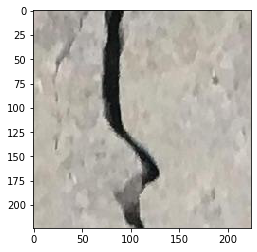

In [19]:
img1 = image.load_img("19751.jpg",target_size=(224,224))

img1 = np.asarray(img1)
plt.imshow(img1)
img1 = np.expand_dims(img1, axis=0)

output1 = cnn.predict(img1)
print(output1)

if output1[0][1] == 0:
    print("negative")
else:
    print('positive')

[[0. 0.]]
negative


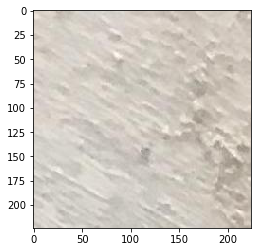

In [20]:
img2 = image.load_img("19752.jpg",target_size=(224,224))

img2 = np.asarray(img2)
plt.imshow(img2)
img2 = np.expand_dims(img2, axis=0)

output2 = cnn.predict(img2)
print(output2)

if output2[0][1] == 0:
    print("negative")
else:
    print('positive')

[[0. 0.]]
negative


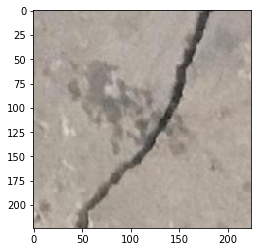

In [21]:
img3 = image.load_img("19753.jpg",target_size=(224,224))

img3 = np.asarray(img3)
plt.imshow(img3)
img3 = np.expand_dims(img3, axis=0)

output3 = cnn.predict(img3)
print(output3)

if output3[0][1] == 0:
    print("negative")
else:
    print('positive')

[[0. 1.]]
positive


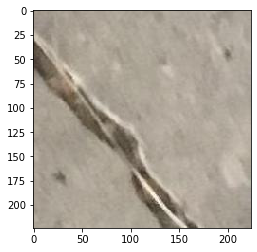

In [22]:
img4 = image.load_img("19754.jpg",target_size=(224,224))

img4 = np.asarray(img4)
plt.imshow(img4)
img4 = np.expand_dims(img4, axis=0)

output4 = cnn.predict(img4)
print(output4)

if output4[0][1] == 0:
    print("negative")
else:
    print('positive')

[[0. 0.]]
negative


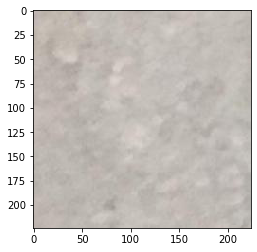

In [23]:
img5 = image.load_img("19755.jpg",target_size=(224,224))

img5 = np.asarray(img5)
plt.imshow(img5)
img5 = np.expand_dims(img5, axis=0)

output5 = cnn.predict(img5)
print(output5)

if output5[0][1] == 0:
    print("negative")
else:
    print('positive')

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).